
# SpatialData Reference

Convert the same dataset to SpatialData directly and compare the version created with the `tiledbsoma` library.

## Setup

In [2]:
import json
from pathlib import Path

import spatialdata as sd
import spatialdata_io as sdio
import spatialdata_plot
from scanpy.datasets._datasets import (
    _download_visium_dataset as download_visium_dataset,
)

Load dataset info from `config.json`. 

In [4]:
with open("../config.json", "r") as f:
    config = json.load(f)

dataset = config["datasets"][0]
dataset

{'experiment_name': 'CytAssist_FFPE_Mouse_Brain_Rep2',
 'spaceranger_version': '2.0.0'}

## Download and inspect the data

In [5]:
data_dir = Path(config["data_dir"])
if not data_dir.exists():
    data_dir.mkdir()

dataset_dir = download_visium_dataset(
    sample_id=dataset["experiment_name"],  # type: ignore
    spaceranger_version=dataset["spaceranger_version"],  # type: ignore
    base_dir=data_dir,
)

100%|██████████| 28.1M/28.1M [00:00<00:00, 32.2MB/s]
100%|██████████| 13.0M/13.0M [00:00<00:00, 28.0MB/s]


## Dataset directory structure

Take a look at the structure of the downloaded dataset.

In [6]:
!tree {dataset_dir}

data/CytAssist_FFPE_Mouse_Brain_Rep2
├── CytAssist_FFPE_Mouse_Brain_Rep2_spatial.tar.gz
├── filtered_feature_bc_matrix.h5
└── spatial
    ├── aligned_fiducials.jpg
    ├── aligned_tissue_image.jpg
    ├── cytassist_image.tiff
    ├── detected_tissue_image.jpg
    ├── scalefactors_json.json
    ├── spatial_enrichment.csv
    ├── tissue_hires_image.png
    ├── tissue_lowres_image.png
    └── tissue_positions.csv

2 directories, 11 files


## Convert

In [7]:
exp_name = dataset["experiment_name"].lower()
sdata = sdio.visium(path=dataset_dir, dataset_id=exp_name)
sdata

INFO     reading data/CytAssist_FFPE_Mouse_Brain_Rep2/filtered_feature_bc_matrix.h5                                


/Users/aaronwolen/repos/uv-soma-test/.venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/aaronwolen/repos/uv-soma-test/.venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/aaronwolen/repos/uv-soma-test/.venv/lib/python3.9/site-packages/spatialdata/models/models.py:1035: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)


SpatialData object
├── Images
│     ├── 'cytassist_ffpe_mouse_brain_rep2_hires_image': DataArray[cyx] (3, 2000, 1692)
│     └── 'cytassist_ffpe_mouse_brain_rep2_lowres_image': DataArray[cyx] (3, 600, 508)
├── Shapes
│     └── 'cytassist_ffpe_mouse_brain_rep2': GeoDataFrame shape: (2235, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (2235, 19465)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        cytassist_ffpe_mouse_brain_rep2_hires_image (Images), cytassist_ffpe_mouse_brain_rep2 (Shapes)
    ▸ 'downscaled_lowres', with elements:
        cytassist_ffpe_mouse_brain_rep2_lowres_image (Images), cytassist_ffpe_mouse_brain_rep2 (Shapes)
    ▸ 'global', with elements:
        cytassist_ffpe_mouse_brain_rep2 (Shapes)

## Visualize

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4625..1.0].


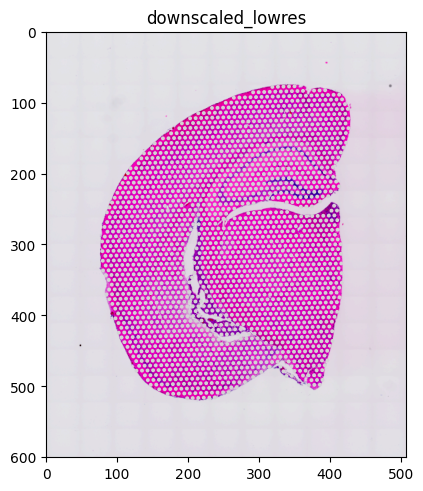

In [21]:
sdata.pl.render_images().pl.render_shapes().pl.show("downscaled_lowres")

In [13]:
sdata["table"].to_df().sum(axis=0).sort_values(ascending=False).head(10)

Ttr        667081.0
Fth1       108798.0
Camk2n1    104989.0
Atp1b1     101138.0
Snap25      99798.0
Calm1       82299.0
App         80407.0
Mbp         77770.0
Olfm1       71877.0
Tmsb4x      71351.0
dtype: float32

/var/folders/nr/1dsl0n155wj7wv083km8t1540000gn/T/ipykernel_39884/2504518072.py:2: DeprecationWarning: `elements` is being deprecated as an argument to `PlotAccessor.render_shapes.render_shapes` in spatialdata_plot version 0.3.0, switch to `element` instead.
  sdata.pl.render_images(element="cytassist_ffpe_mouse_brain_rep2_hires_image")


INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4829932..1.0].


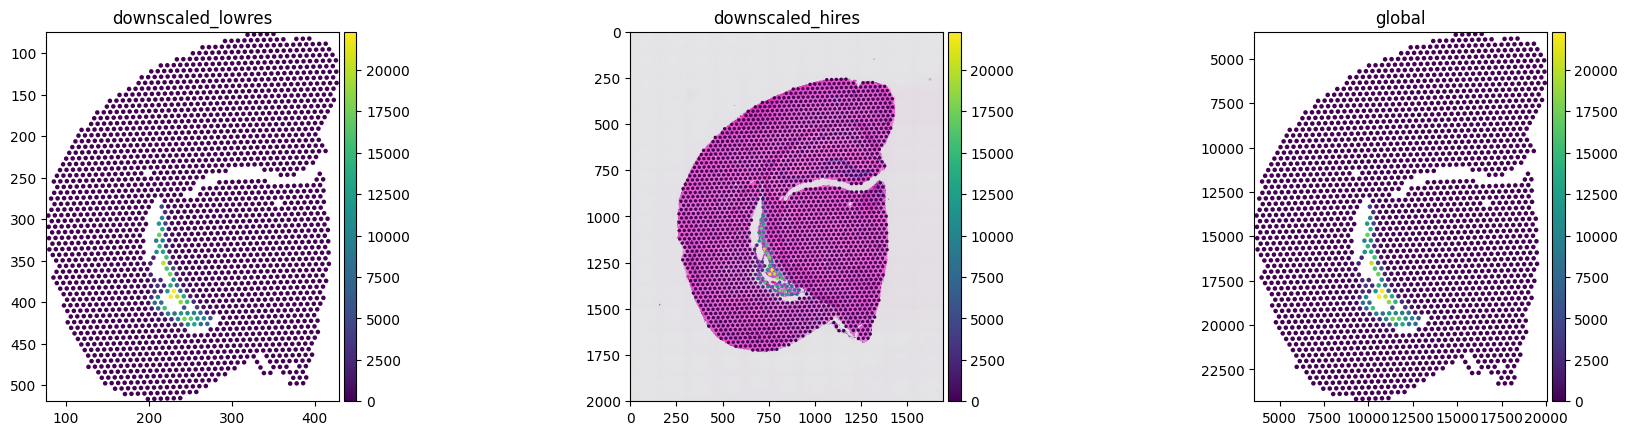

In [23]:
(
    sdata.pl.render_images(element="cytassist_ffpe_mouse_brain_rep2_hires_image")
    .pl.render_shapes(elements="cytassist_ffpe_mouse_brain_rep2", color="Ttr")
    .pl.show()
)

## Table

### obs

In [24]:
sdata.tables["table"].obs

,in_tissue,array_row,array_col,spot_id,region
AACACTTGGCAAGGAA-1,1,47,71,0,cytassist_ffpe_mouse_brain_rep2
AACAGGATTCATAGTT-1,1,49,43,1,cytassist_ffpe_mouse_brain_rep2
AACAGGTTATTGCACC-1,1,28,86,2,cytassist_ffpe_mouse_brain_rep2
AACAGGTTCACCGAAG-1,1,51,41,3,cytassist_ffpe_mouse_brain_rep2
AACCAAGGTATCAGGC-1,1,38,104,4,cytassist_ffpe_mouse_brain_rep2
...,...,...,...,...,...
TGTTGCGTCCAAGATT-1,1,51,65,2230,cytassist_ffpe_mouse_brain_rep2
TGTTGGAACCTTCCGC-1,1,35,35,2231,cytassist_ffpe_mouse_brain_rep2
TGTTGGAACGAGGTCA-1,1,28,72,2232,cytassist_ffpe_mouse_brain_rep2
TGTTGGATGGACTTCT-1,1,13,53,2233,cytassist_ffpe_mouse_brain_rep2


In [25]:
sdata.tables["table"].uns

OrderedDict([('spatial',
              {'cytassist_ffpe_mouse_brain_rep2': {'metadata': {'chemistry_description': 'Visium V4 Slide',
                 'software_version': 'spaceranger-2.0.0'}}}),
             ('spatialdata_attrs',
              {'region': 'cytassist_ffpe_mouse_brain_rep2',
               'region_key': 'region',
               'instance_key': 'spot_id'})])